### NAZIRAH PROJECT
Machine Learning Model Designed to find the highest predictors causing heart failure in adults. 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
heart_failure_file = pd.read_csv('/Users/collinlindsay/Desktop/heart_failure_clinical_records_dataset_2.csv')

In [3]:
heart_failure_file.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [53]:
heart_failure_file['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Text(0.5, 1.0, 'AGE DEMOGRAPHICS OF 299 PATIENTS')

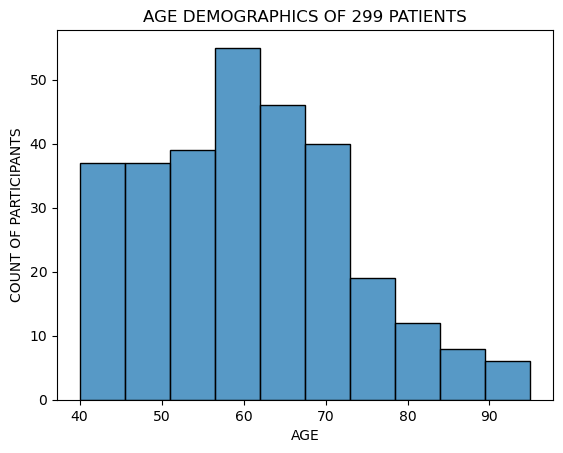

In [58]:
sns.histplot(heart_failure_file['age'])
plt.xlabel('AGE')
plt.ylabel('COUNT OF PARTICIPANTS')
plt.title('AGE DEMOGRAPHICS OF 299 PATIENTS')


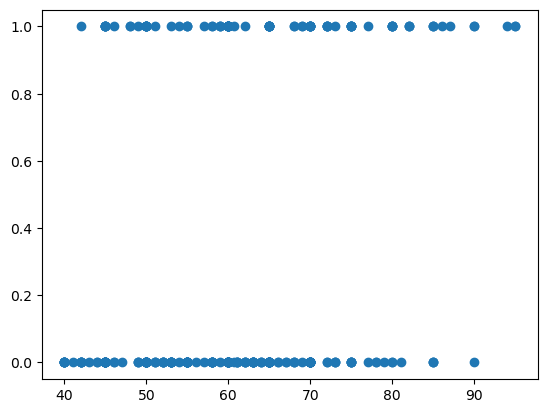

In [61]:
plt.scatter(heart_failure_file['age'], heart_failure_file['DEATH_EVENT'])


In [4]:
age = heart_failure_file['age']
anaemia = heart_failure_file['anaemia']
creat = heart_failure_file['creatinine_phosphokinase']
diabetes = heart_failure_file['diabetes']
ejection = heart_failure_file['ejection_fraction']
high_blood_pressure = heart_failure_file['high_blood_pressure']
platelets = heart_failure_file['platelets']
serum_creat = heart_failure_file['serum_creatinine']
sodium = heart_failure_file['serum_sodium']
sex = heart_failure_file['sex']
smoking = heart_failure_file['smoking']
time = heart_failure_file['time']
death = heart_failure_file['DEATH_EVENT']

In [5]:
heart_failure_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: >

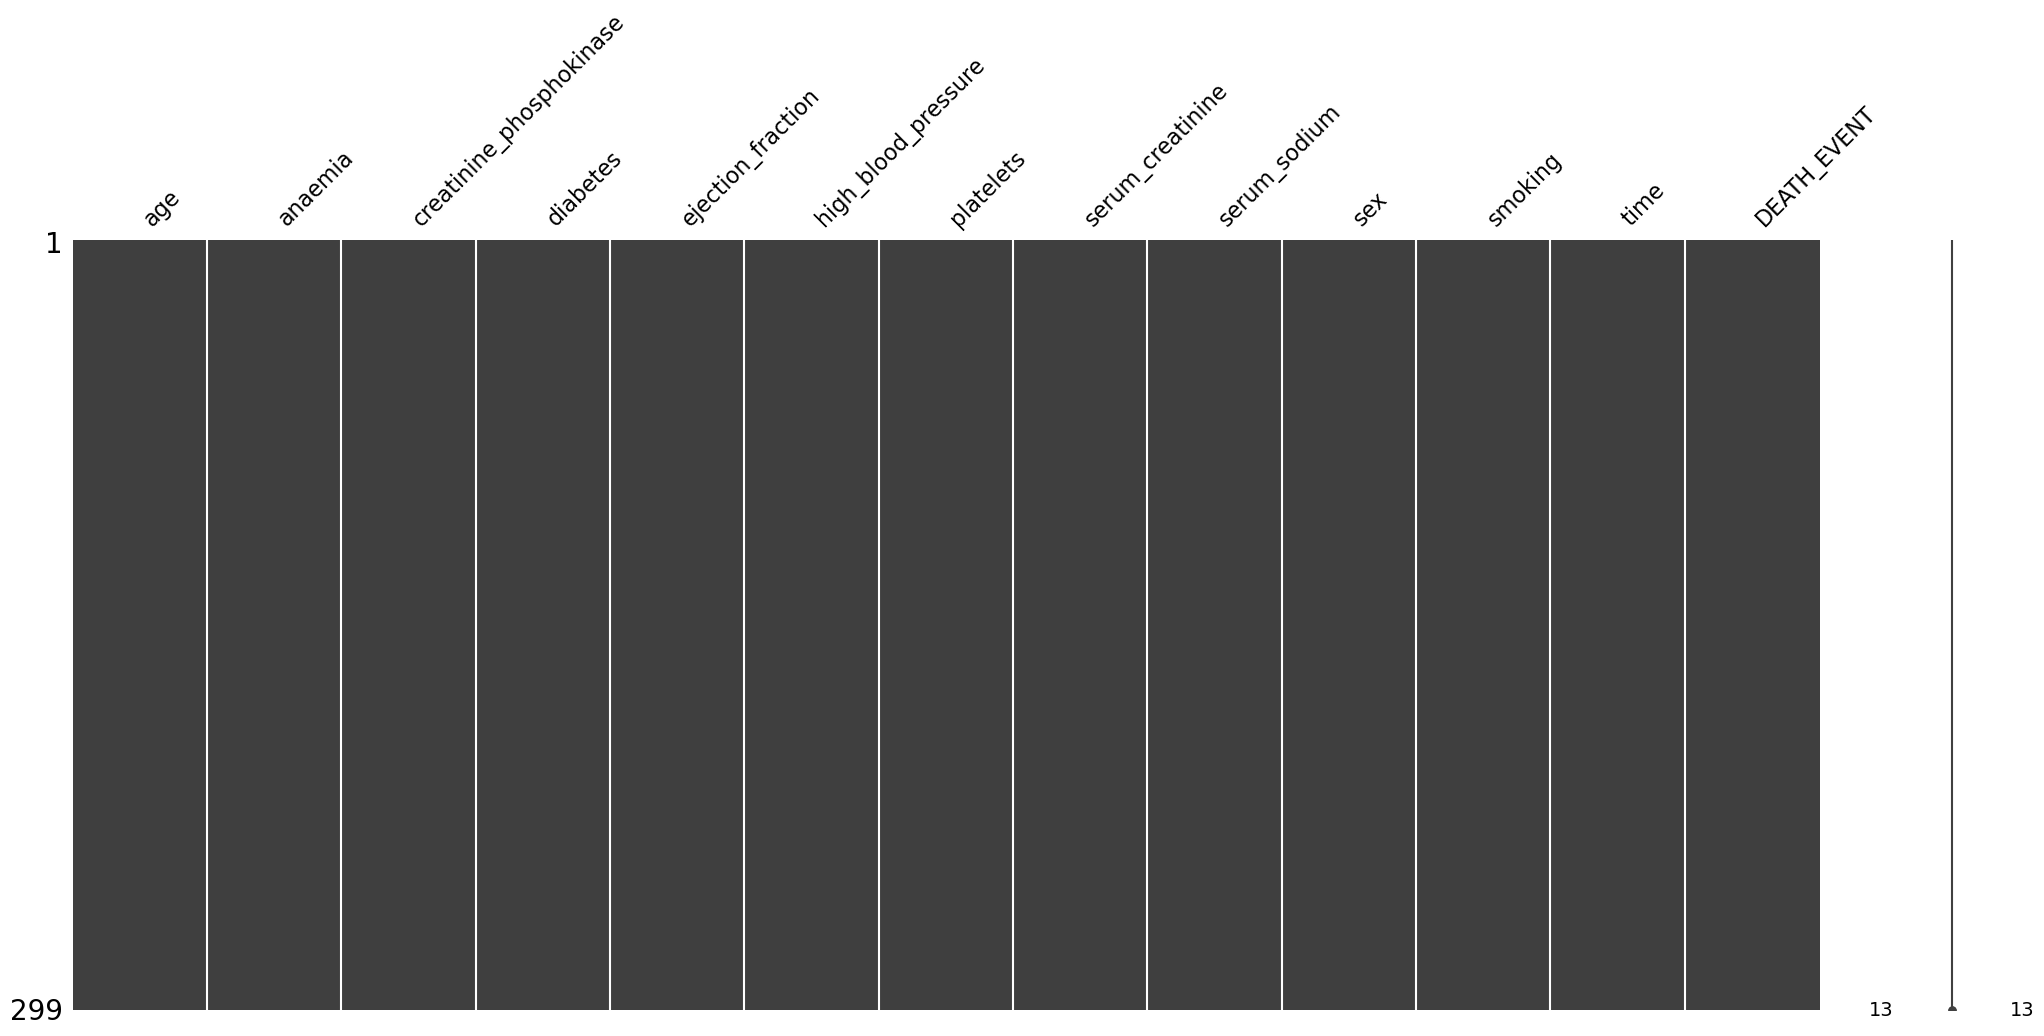

In [34]:
msno.matrix(heart_failure_file)

In [6]:
heart_failure_file.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


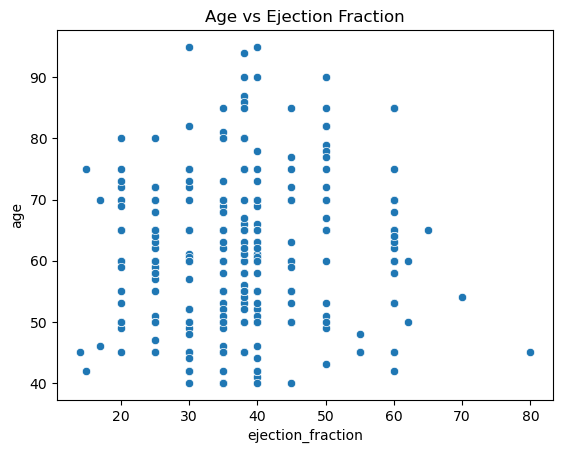

In [41]:
sns.scatterplot(data=heart_failure_file, x="ejection_fraction", y="age")
plt.title('Age vs Ejection Fraction')
plt.show()

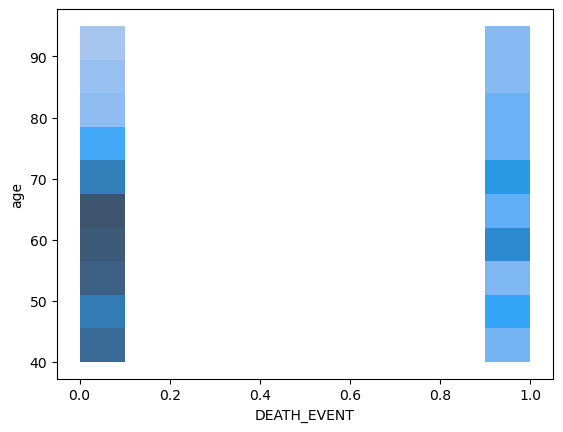

In [45]:
sns.histplot(data=heart_failure_file, x="DEATH_EVENT", y="age")
plt.title('')
plt.show()

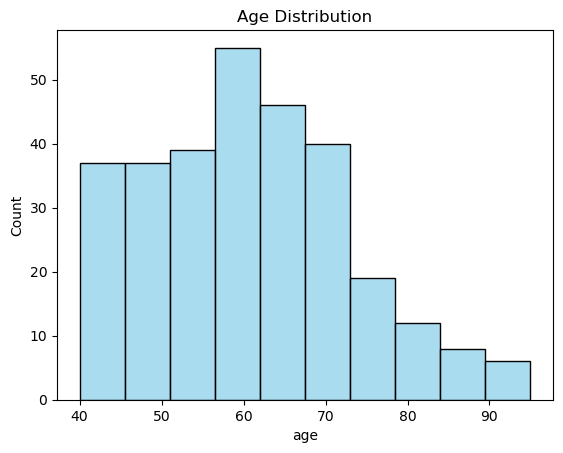

In [7]:
sns.histplot(data=age, kde=False, color="skyblue", alpha=0.7)
plt.title('Age Distribution')
plt.show()

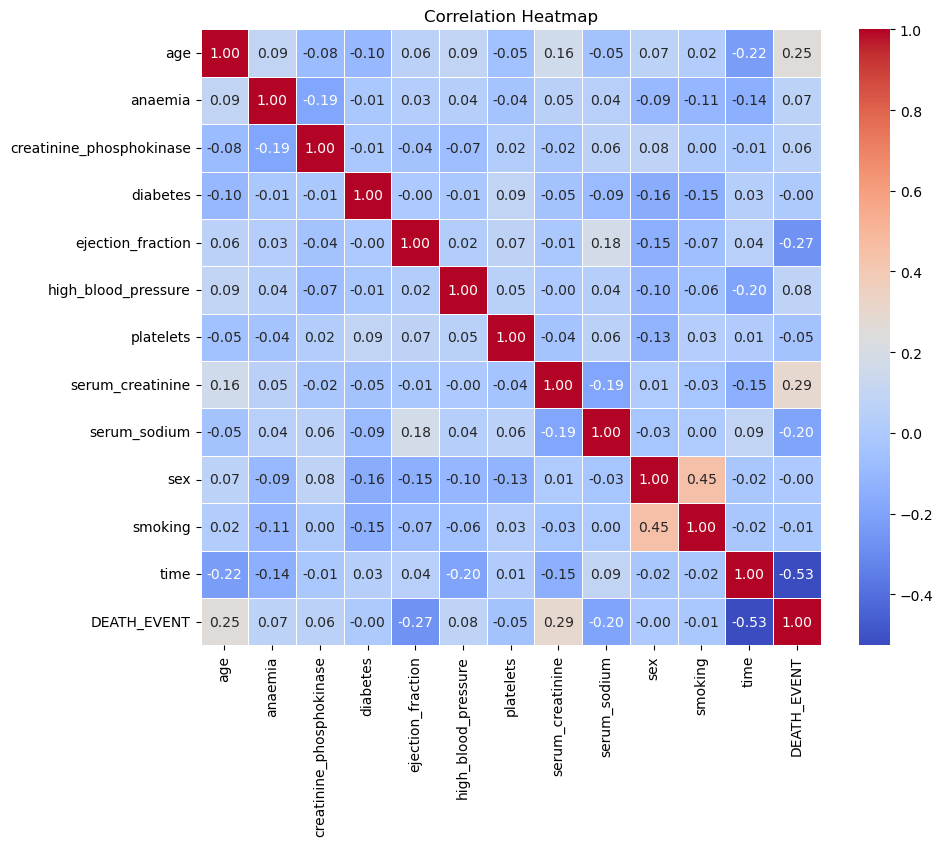

In [8]:
correlation_matrix = heart_failure_file.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Models: Logistic Regression, Random Forest, Extra Trees, Gradient Boosting,
# HistGradientBoosting, AdaBoost, SVC (RBF), KNN, GaussianNB, Decision Tree

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, accuracy_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance

# All the Model Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, HistGradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Model Data Definitions

df = heart_failure_file
#df.columns = [c.strip() for c in df.columns]

target_col = "DEATH_EVENT" if "DEATH_EVENT" in df.columns else "death_event"

X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

# numerical columns 
numeric_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
categorical_cols = [c for c in X.columns if c not in numeric_cols]
if categorical_cols:
    X = X[numeric_cols]
    numeric_cols = X.columns.tolist()

#  Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessors 
ct_scaled = ColumnTransformer(
    transformers=[("num", Pipeline([("scaler", StandardScaler())]), numeric_cols)],
    remainder="drop"
)
ct_passthrough = ColumnTransformer(
    transformers=[("num", "passthrough", numeric_cols)],
    remainder="drop"
)

# Models and pipelines
models = {
    "Logistic Regression": Pipeline([("prep", ct_scaled),       ("clf", LogisticRegression(max_iter=1000))]),
    "Random Forest":       Pipeline([("prep", ct_passthrough),  ("clf", RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))]),
    "Extra Trees":         Pipeline([("prep", ct_passthrough),  ("clf", ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1))]),
    "Gradient Boosting":   Pipeline([("prep", ct_passthrough),  ("clf", GradientBoostingClassifier(random_state=42))]),
    "HistGradientBoosting":Pipeline([("prep", ct_passthrough),  ("clf", HistGradientBoostingClassifier(random_state=42))]),
    "AdaBoost":            Pipeline([("prep", ct_passthrough),  ("clf", AdaBoostClassifier(random_state=42))]),
    "SVC (RBF)":           Pipeline([("prep", ct_scaled),       ("clf", SVC(kernel="rbf", probability=True, random_state=42))]),
    "KNN":                 Pipeline([("prep", ct_scaled),       ("clf", KNeighborsClassifier(n_neighbors=11))]),
    "GaussianNB":          Pipeline([("prep", ct_scaled),       ("clf", GaussianNB())]),
    "Decision Tree":       Pipeline([("prep", ct_passthrough),  ("clf", DecisionTreeClassifier(random_state=42))]),
}

# assists for better model producivity
def _scores_for_auc(model, X):
    clf = model.named_steps["clf"]
    if hasattr(clf, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(clf, "decision_function"):
        return model.decision_function(X)
    return model.predict(X)  # last resort

def _top_predictors(model, X, y, feature_names, k=5):
    """Return top-k (feature, importance) for the fitted pipeline model."""
    clf = model.named_steps["clf"]
    # Tree-based feature_importances_
    if hasattr(clf, "feature_importances_"):
        vals = clf.feature_importances_
        order = np.argsort(vals)[::-1][:k]
        return [(feature_names[i], float(vals[i])) for i in order]
    # Linear coefficients
    if hasattr(clf, "coef_"):
        vals = np.abs(clf.coef_).ravel()
        order = np.argsort(vals)[::-1][:k]
        return [(feature_names[i], float(vals[i])) for i in order]
    
    sample_n = min(100, X.shape[0])
    r = permutation_importance(
        model, X.iloc[:sample_n], y.iloc[:sample_n],
        scoring="roc_auc", n_repeats=3, random_state=42, n_jobs=-1
    )
    vals = r.importances_mean
    order = np.argsort(vals)[::-1][:k]
    return [(feature_names[i], float(vals[i])) for i in order]

# trainining, evaluation, collection
rows = []
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred  = pipe.predict(X_test)
    y_score = _scores_for_auc(pipe, X_test)

    precision = precision_score(y_test, y_pred, zero_division=0)
    accuracy  = accuracy_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    try:
        auc = roc_auc_score(y_test, y_score)
    except Exception:
        auc = roc_auc_score(y_test, y_pred)

    tops = _top_predictors(pipe, X_test, y_test, numeric_cols, k=5)

    rows.append({
        "Model": name,
        "Precision": round(float(precision), 4),
        "Accuracy":  round(float(accuracy),  4),
        "F1":        round(float(f1),        4),
        "AUC":       round(float(auc),       4),
        "Top Predictors": ", ".join([f"{f} ({imp:.3f})" for f, imp in tops])
    })

report = pd.DataFrame(rows).sort_values("AUC", ascending=False).reset_index(drop=True)
print(report.to_string(index=False))


               Model  Precision  Accuracy     F1    AUC                                                                                                            Top Predictors
       Random Forest     0.7857    0.8167 0.6667 0.8825                         time (0.368), serum_creatinine (0.146), ejection_fraction (0.135), platelets (0.077), age (0.076)
            AdaBoost     0.7647    0.8333 0.7222 0.8736    time (0.400), platelets (0.200), serum_creatinine (0.100), ejection_fraction (0.080), creatinine_phosphokinase (0.080)
 Logistic Regression     0.7857    0.8167 0.6667 0.8588          time (1.577), ejection_fraction (0.910), serum_creatinine (0.788), age (0.416), creatinine_phosphokinase (0.276)
         Extra Trees     0.7000    0.7500 0.4828 0.8549 time (0.286), ejection_fraction (0.143), serum_creatinine (0.133), creatinine_phosphokinase (0.078), serum_sodium (0.077)
HistGradientBoosting     0.8462    0.8333 0.6875 0.8485                               time (0.246), ejection_f

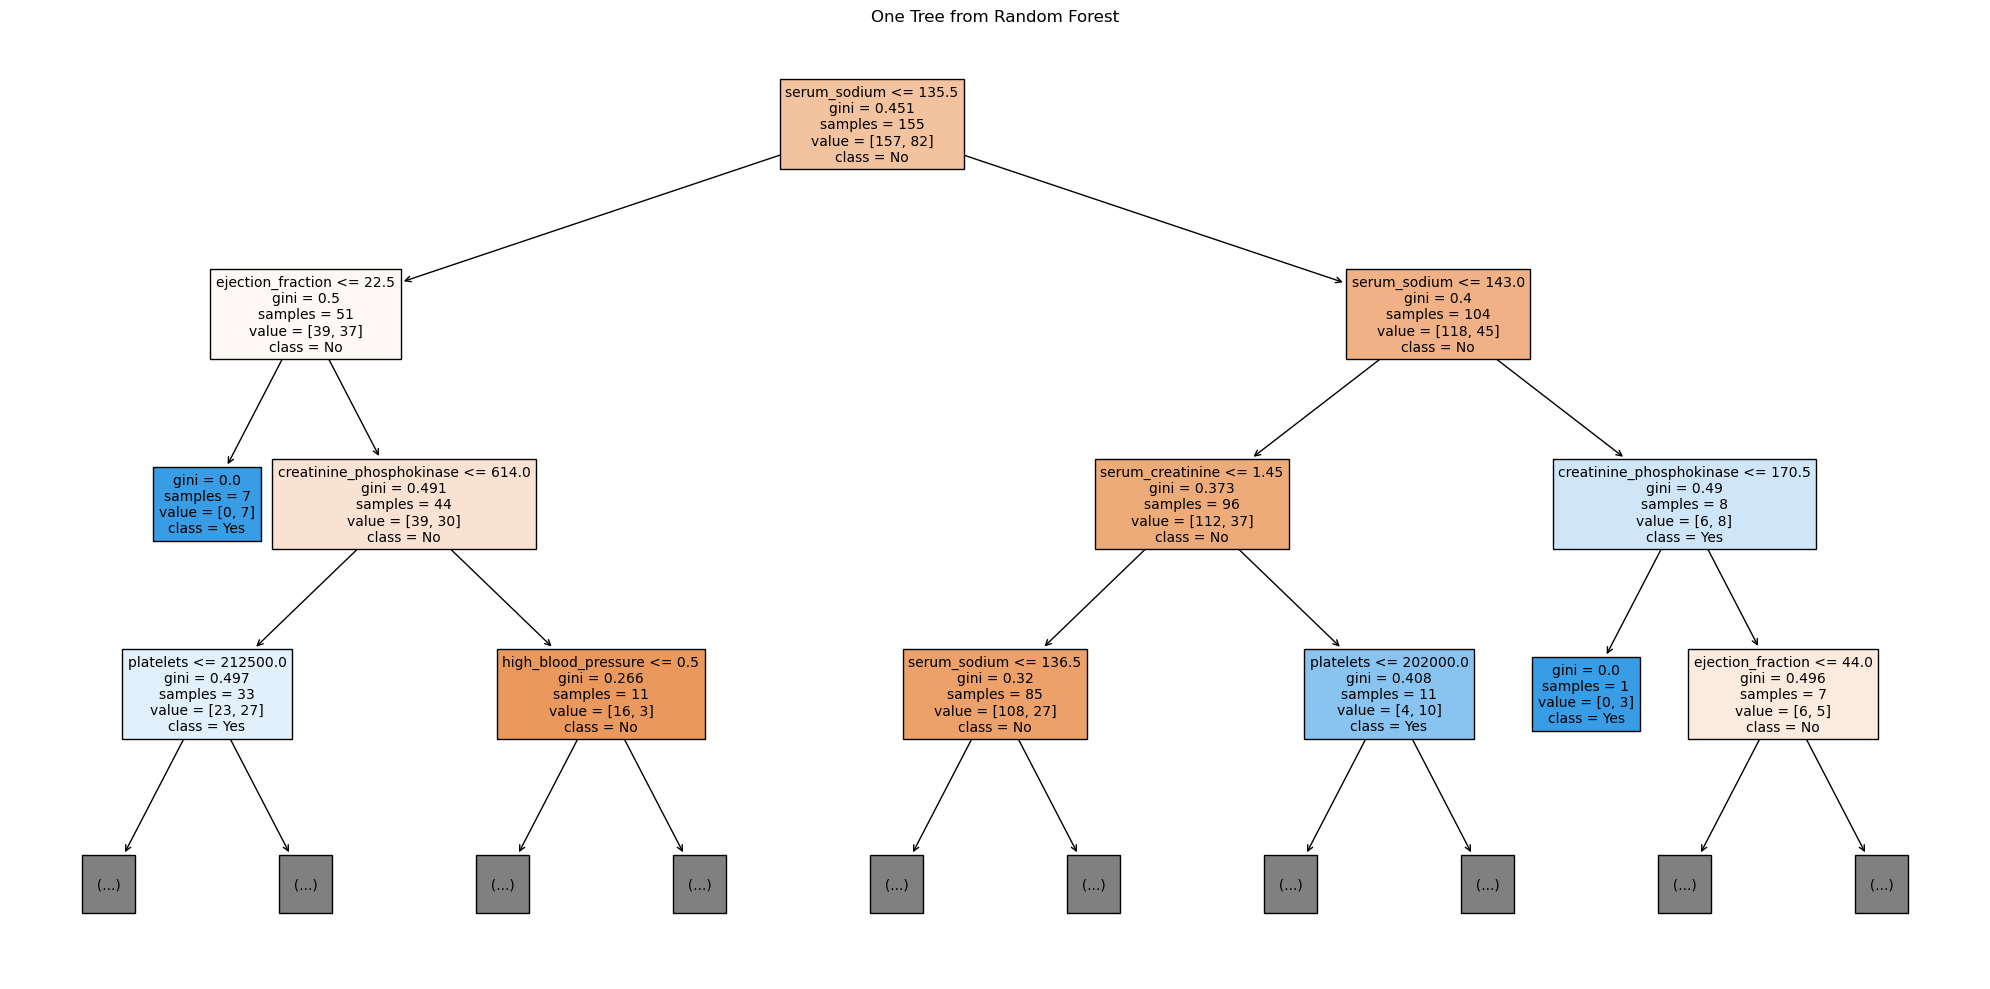

In [30]:
# single random forest tree for intepretation
# Fitting Random Forest Model
rf_pipe = models["Random Forest"]
rf_pipe.fit(X_train, y_train)

# Extract the trained RandomForestClassifier
best_rf = rf_pipe.named_steps["clf"]

# Select one tree from the ensemble
one_tree = best_rf.estimators_[0]

# Plotting the tree for clarity)
plt.figure(figsize=(20, 10))
plot_tree(
    one_tree,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    max_depth=3, # for clairty
    fontsize=10
)
plt.title("One Tree from Random Forest")
plt.tight_layout()

In [36]:
heart_failure_file.shape

(299, 13)